In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit
from numpy.testing import assert_allclose
import sympy as sp

In [29]:
def latex_np(np_array):
    return sp.latex(sp.Matrix(np_array).evalf(3))

In [2]:
df = pd.read_csv('cereal.csv')
cal = np.array(df['calories'])
fiber =np.array(df['fiber'])
fat = np.array(df['fat'])
cups = np.array(df['cups'])
cnt, = cal.shape

In [82]:
Data_Matrix = np.array([fiber,fat,cal])
print(Data_Matrix)

[[ 10.    2.    9.   14.    1.    1.5   1.    2.    4.    5.    0.    2.
    0.    2.    0.    0.    1.    1.    0.    4.    1.    1.    2.    1.
    1.    1.    3.    5.    5.    0.    0.    0.    3.    3.    3.    1.
    1.5   0.    1.    2.    0.    2.    0.    0.    3.    3.    3.    2.
    0.    3.    3.    1.5   6.    1.    0.    1.    2.    2.7   5.    2.5
    2.    0.    0.    3.    4.    3.    1.    1.    3.    0.    4.    3.
    0.    0.    3.    3.    1. ]
 [  1.    5.    1.    0.    2.    2.    0.    2.    1.    0.    2.    2.
    3.    2.    1.    0.    0.    0.    1.    3.    0.    0.    1.    0.
    1.    0.    0.    2.    0.    1.    0.    1.    1.    0.    3.    2.
    1.    0.    1.    1.    1.    2.    1.    1.    3.    3.    2.    1.
    1.    2.    0.    2.    1.    0.    0.    0.    1.    2.    1.    2.
    0.    0.    0.    0.    0.    0.    1.    0.    0.    1.    1.    1.
    1.    1.    1.    1.    1. ]
 [ 70.  120.   70.   50.  110.  110.  110.  130.   90.   

In [84]:
num_rows,num_cols = Data_Matrix.shape
num_cols

77

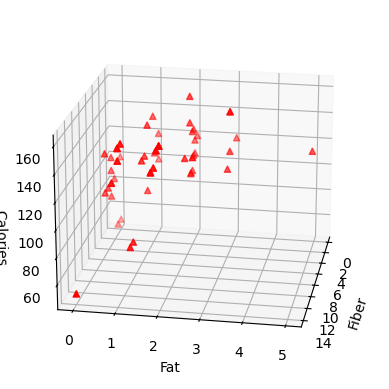

In [86]:
fig = plt.figure();
ax = fig.add_subplot(projection='3d');
ax.scatter(fiber,fat,cal,marker='^',color='r');
ax.set_xlabel('Fiber');
ax.set_ylabel('Fat');
ax.set_zlabel('Calories');
ax.view_init(elev=20, azim=10,roll=0)
fig.savefig("initial_ceral_data.png")

In [88]:
Sample_Mean = np.array([1/num_cols * Data_Matrix.sum(axis=1)]).transpose()
Sample_Mean

array([[  2.15194805],
       [  1.01298701],
       [106.88311688]])

In [126]:
Mean_Deviation = Data_Matrix - Sample_Mean
M = sp.Matrix(Mean_Deviation[:,num_cols-2:num_cols])
N = sp.Matrix(Mean_Deviation[:,0:2])
CDot = sp.Matrix([["cdots"],["cdots"],["cdots"]])
M = M.col_insert(0,CDot)
M = M.col_insert(0,N)
print(M,"\n")
print(sp.latex(M.evalf(3)))

Matrix([[7.84805194805195, -0.151948051948052, cdots, 0.848051948051948, -1.15194805194805], [-0.0129870129870131, 3.98701298701299, cdots, -0.0129870129870131, -0.0129870129870131], [-36.8831168831169, 13.1168831168831, cdots, -6.88311688311688, 3.11688311688312]]) 

\left[\begin{matrix}7.85 & -0.152 & cdots & 0.848 & -1.15\\-0.013 & 3.99 & cdots & -0.013 & -0.013\\-36.9 & 13.1 & cdots & -6.88 & 3.12\end{matrix}\right]


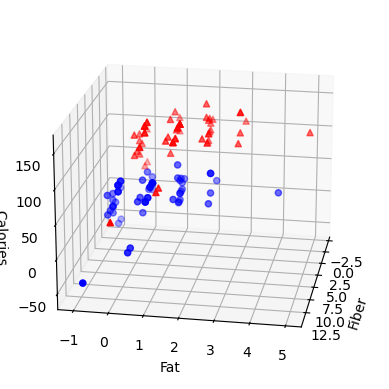

In [92]:
xdata = Mean_Deviation[0]
ydata = Mean_Deviation[1]
zdata = Mean_Deviation[2]
ax.scatter(xdata,ydata,zdata,marker='o',color='b');
fig.savefig("mean_deviation_ceral.png")
fig

In [128]:
Covariance_Matrix = 1/(num_cols-1)*Mean_Deviation@Mean_Deviation.transpose()

In [136]:
print(Covariance_Matrix)
print(latex_np(Covariance_Matrix))

[[ 5.68042379e+00  4.01059467e-02 -1.36254272e+01]
 [ 4.01059467e-02  1.01298701e+00  9.77785373e+00]
 [-1.36254272e+01  9.77785373e+00  3.79630895e+02]]
\left[\begin{matrix}5.68 & 0.0401 & -13.6\\0.0401 & 1.01 & 9.78\\-13.6 & 9.78 & 380.0\end{matrix}\right]


### What Did We Just Calculate?
When calculating the vector Sample Mean each entry looks like
$$\mu_i = \frac{1}{N}\sum_i x_{ij},$$
which is the mean of row $i$. Then, the entries in the Mean Deviation Matrix are
$$b_{ij} = x_{ij}-\mu_i,$$
this measures the absolute deviation of each of the original values from the mean.  Finally, the Covariance Matrix has entries
$$CM_{i,j}=\frac{1}{N-1}\sum (x_i-\mu_i)(x_j-\mu_j),$$
so that when $i=j$ this is the variance of the $i^{th}$ row and when $i\neq j$ it is the covarinace between the variables.  Note that, because of how the Covariance Matrix is calculated it is symmetric and positive definite.  The sum of the enties on the diagonal, the trace, will give the total variance and it can be orthogonally decomposed.

In [12]:
# The total variance is
Covariance_Matrix.trace()

3661.9896104881955

### Recall Our Change of Variable
If we find the eigenvectors of a matrix 

In [138]:
# We use the eigenvalues and Eigenvectors to build the orthogonal diagonalization
eigvals, eigvecs = la.eig(Covariance_Matrix)
P = eigvecs
Pinv = la.inv(P)
D = np.diag(eigvals)
D.trace()

386.32430622009565

In [15]:
# We can see that the eigenvectors are orthogonal since the 
# inverse of P and its transpose are the same.
assert_allclose(P.transpose(),Pinv,atol=1e-30)

In [148]:
print(latex_np(D))
print(latex_np(P))
print("\n",D)
print("\n",P)

\left[\begin{matrix}380.0 & 0 & 0\\0 & 5.22 & 0\\0 & 0 & 0.726\end{matrix}\right]
\left[\begin{matrix}0.0363 & 0.995 & -0.0874\\-0.0257 & 0.0883 & 0.996\\-0.999 & 0.0339 & -0.0288\end{matrix}\right]

 [[380.3783089    0.           0.        ]
 [  0.           5.2197057    0.        ]
 [  0.           0.           0.72629162]]

 [[ 0.03632495  0.99551298 -0.08737506]
 [-0.02574484  0.08833596  0.99575798]
 [-0.99900836  0.0339214  -0.02883813]]


In [150]:
V = P[:,0]
W = P[:,1]

In [268]:
T = np.linspace(-50,60,100)
S = np.linspace(-10,10,100)
T,S = np.meshgrid(T,S)

In [270]:
Xvals = V[0]*T+W[0]*S+Sample_Mean[0]
Yvals = V[1]*T+W[1]*S+Sample_Mean[1]
Zvals = V[2]*T+W[2]*S+Sample_Mean[2]
np.max(Xvals)

14.286575062085513

In [272]:
WXvals = (W[0]*S+Sample_Mean[0]).reshape(100**2)
WYvals = (W[1]*S+Sample_Mean[1]).reshape(100**2)
WZvals = (W[2]*S+Sample_Mean[2]).reshape(100**2)
WXvals.shape

(10000,)

In [274]:
VXvals = (V[0]*T+Sample_Mean[0]).reshape(100**2)
VYvals = (V[1]*T+Sample_Mean[1]).reshape(100**2)
VZvals = (V[2]*T+Sample_Mean[2]).reshape(100**2)
VXvals.shape

(10000,)

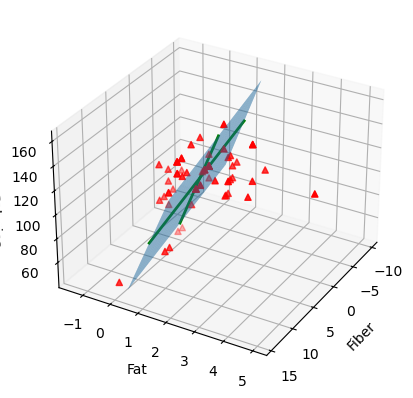

In [292]:
# fig,ax = plt.subplots(subplot_kw={'projection':'3d'},figsize=(10,6))
fig2 = plt.figure();
ax2 = fig2.add_subplot(projection='3d');

ax2.scatter(fiber,fat,cal,marker='^',color='r');
ax2.plot_surface(Xvals,Yvals,Zvals,alpha=0.6);
ax2.plot(WXvals,WYvals,WZvals,color='g',linewidth=2);
ax2.plot(VXvals,VYvals,VZvals,color='g',linewidth=2);

ax2.set_xlabel('Fiber');
ax2.set_ylabel('Fat');
ax2.set_zlabel('Calories');

ax2.view_init(elev=30, azim=30,roll=0);

In [294]:
fig2.savefig("proj_plane.png")

In [186]:
V

array([ 0.03632495, -0.02574484, -0.99900836])

In [188]:
W

array([0.99551298, 0.08833596, 0.0339214 ])